# LOAD package

In [1]:
%pylab
from astropy.table import Table

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(font_scale=2)
# sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.set_style("ticks")

In [80]:
# import seaborn as sns
# sns.set()
# # sns.set(rc={'figure.figsize':(15.7,8.27)})
# # sns.set_style("white")
# # sns.set_context("talk")
# sns.set_style("ticks")

# TNG

In [5]:
!pwd

/home/yunzheng/PAC_final/PAC/0_0.2


In [40]:
np.std?

Signature:
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a standard deviation is performed over
    multiple axes, instead of a single axis or all the axes as before.
dtype : dtype, optional
    Type to use in computing the standard deviation. For arrays of
    integer type the default is float64, for 

# jackknife

## 3 redshift bins

In [4]:
m_sate = [9.0,9.5,10.0,10.5]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
# r = r[4:-2]
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
#m_sate = [9.5,10.0]
m_cen = [11.4,11.6]
#n = ['blue','red']
jack=50
zs = ['0p075','0p125','0p175']
# zs = ['0p075','0p125']
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        #print(m_cen[i]-0.1,m_sate[j])
        #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
        #    continue
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('./SDSS_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./SDSS_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            print("Orignal para:")
            print(para)
            
            pcf += (data * para)
#             print("pcf 0:")
#             print(pcf[0])
            para1 += para
            print("final para:")
            print(para1)
        print("sum para:")
        print(para1)

        pcf = pcf/para1
        #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
        pcf_mean = np.mean(pcf,axis=0)
        pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
        np.save('./SDSS_PAC/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
Orignal para:
[4895]
final para:
[9245]
sum para:
[9245]
Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
Orignal para:
[4895]
final para:
[9245]
sum para:
[9245]
Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
Orignal para:
[4895]
final para:
[9245]
sum para:
[9245]
Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
Orignal para:
[4895]
final para:
[9245]
sum para:
[9245]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
Orignal para:
[963]
final para:
[1806]
sum para:
[1806]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
Orignal para:
[963]
final para:
[1806]
sum para:
[1806]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
Orignal para:
[963]
final para:
[1806]
sum para:
[1806]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653

## 2 redshift bins

In [5]:
m_sate = [9.0,9.5,10.0,10.5]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
# r = r[4:-2]
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
#m_sate = [9.5,10.0]
m_cen = [11.4,11.6]
#n = ['blue','red']
jack=50
# zs = ['0p075','0p125','0p175']
zs = ['0p075','0p125']
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        #print(m_cen[i]-0.1,m_sate[j])
        #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
        #    continue
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('./SDSS_PAC/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./SDSS_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            print("Orignal para:")
            print(para)
            
            pcf += (data * para)
#             print("pcf 0:")
#             print(pcf[0])
            para1 += para
            print("final para:")
            print(para1)
        print("sum para:")
        print(para1)

        pcf = pcf/para1
        #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
        pcf_mean = np.mean(pcf,axis=0)
        pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
        np.save('./SDSS_PAC_new_cor/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
sum para:
[4350]
Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
sum para:
[4350]
Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
sum para:
[4350]
Orignal para:
[1153]
final para:
[1153]
Orignal para:
[3197]
final para:
[4350]
sum para:
[4350]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
sum para:
[843]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
sum para:
[843]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
sum para:
[843]
Orignal para:
[190]
final para:
[190]
Orignal para:
[653]
final para:
[843]
sum para:
[843]


In [13]:
# m_sate = [9.0,9.5,10.0,10.5]
# #m_sate = np.linspace(9.0,11.7,28)
# r = np.logspace(-2, 2, 21)
# r = r[4:]
# r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
# #m_sate = [9.5,10.0]
# m_cen = [11.4,11.6]
# #n = ['blue','red']
# jack=50
# zs = ['0p025','0p075','0p125','0p175']
# for i in range(len(m_cen)):
#     for j in range(len(m_sate)):
#         #print(m_cen[i]-0.1,m_sate[j])
#         #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
#         #    continue
# #         pcf = np.zeros((jack,len(r_need)))
#         for k in range(len(zs)):
#             print("this is %s central %s sat %s redshift"%(m_cen[i],m_sate[j],zs[k]))
#             data = np.load('./sdss_PAC/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
#             print(data)
# #             pcf+=data
# #         pcf = pcf/len(zs)
#         #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
# #         pcf_mean = np.mean(pcf,axis=0)
# #         pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
# #         np.save('./LOWZ_CMASS_PAC/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

this is 11.4 central 9.0 sat 0p025 redshift
[6]
this is 11.4 central 9.0 sat 0p075 redshift
[213]
this is 11.4 central 9.0 sat 0p125 redshift
[865]
this is 11.4 central 9.0 sat 0p175 redshift
[2358]
this is 11.4 central 9.5 sat 0p025 redshift
[6]
this is 11.4 central 9.5 sat 0p075 redshift
[213]
this is 11.4 central 9.5 sat 0p125 redshift
[865]
this is 11.4 central 9.5 sat 0p175 redshift
[2358]
this is 11.4 central 10.0 sat 0p025 redshift
[6]
this is 11.4 central 10.0 sat 0p075 redshift
[213]
this is 11.4 central 10.0 sat 0p125 redshift
[865]
this is 11.4 central 10.0 sat 0p175 redshift
[2358]
this is 11.4 central 10.5 sat 0p025 redshift
[6]
this is 11.4 central 10.5 sat 0p075 redshift
[213]
this is 11.4 central 10.5 sat 0p125 redshift
[865]
this is 11.4 central 10.5 sat 0p175 redshift
[2358]
this is 11.6 central 9.0 sat 0p025 redshift
[2]
this is 11.6 central 9.0 sat 0p075 redshift
[29]
this is 11.6 central 9.0 sat 0p125 redshift
[155]
this is 11.6 central 9.0 sat 0p175 redshift
[347]

# all compare

## 3 redshift bins

In [4]:
TNG = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/nwp/nwp_%.1f_%.1f.npy"%(11.3,10.0))

In [6]:
TNG[0]

array([ 8.61980440e+01,  5.82956317e+01,  3.91270703e+01,  2.83523866e+01,
        1.55073705e+01,  8.95977380e+00,  5.04061815e+00,  2.57785706e+00,
        1.12457383e+00,  5.18458232e-01,  3.40596659e-01,  2.49458932e-01,
        2.00844878e-01,  1.40171760e-01,  8.98163014e-02,  6.15608757e-02,
        3.39251887e-02,  8.95096924e-03, -2.02220273e-03, -2.57014877e-03])

# color_cut

## red

### 3 bins

In [6]:
m_sate = [9.0,9.5,10.0,10.5]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
#m_sate = [9.5,10.0]
m_cen = [11.4,11.6]
#n = ['blue','red']
jack=50
zs = ['0p075','0p125','0p175']
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        #print(m_cen[i]-0.1,m_sate[j])
        #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
        #    continue
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('./color_cut_red/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./color_cut_red/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            
        pcf = pcf/para1
        #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
        pcf_mean = np.mean(pcf,axis=0)
        pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
        np.save('./color_cut_red/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

### 2bins

In [7]:
m_sate = [9.0,9.5,10.0,10.5]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
#m_sate = [9.5,10.0]
m_cen = [11.4,11.6]
#n = ['blue','red']
jack=50
zs = ['0p075','0p125']
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        #print(m_cen[i]-0.1,m_sate[j])
        #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
        #    continue
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('./color_cut_red/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./color_cut_red/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            
        pcf = pcf/para1
        #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
        pcf_mean = np.mean(pcf,axis=0)
        pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
        np.save('./color_cut_red_2bins/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

In [22]:
np.load("./color_cut_red_cor/%.1f_%.1f.npy"%(11.4,10.0))

array([[ 7.94328235e-02,  1.25892541e-01,  1.99526231e-01,
         3.16227766e-01,  5.01187234e-01,  7.94328235e-01,
         1.25892541e+00,  1.99526231e+00,  3.16227766e+00,
         5.01187234e+00,  7.94328235e+00,  1.25892541e+01,
         1.99526231e+01,  3.16227766e+01,  5.01187234e+01,
         7.94328235e+01],
       [ 1.58522070e+01,  9.64512261e+00,  6.31915282e+00,
         3.59171837e+00,  2.05073181e+00,  1.03557885e+00,
         4.58131975e-01,  2.41650882e-01,  1.66478183e-01,
         1.07335949e-01,  6.89086834e-02,  1.92715556e-02,
         4.57537752e-03,  1.38493507e-02,  1.46338204e-02,
        -2.76199428e-03],
       [ 9.47972284e-01,  5.97993896e-01,  4.67220246e-01,
         2.50178098e-01,  1.51804104e-01,  1.07860062e-01,
         6.90234730e-02,  5.55962495e-02,  4.31831011e-02,
         3.55362874e-02,  3.14907084e-02,  2.63605992e-02,
         2.33085970e-02,  1.67194260e-02,  1.08899629e-02,
         6.09973428e-03]])

In [65]:
np.load("./color_cut_red_new/%.1f_%.1f.npy"%(11.4,10.0))

array([[ 7.94328235e-02,  1.25892541e-01,  1.99526231e-01,
         3.16227766e-01,  5.01187234e-01,  7.94328235e-01,
         1.25892541e+00,  1.99526231e+00,  3.16227766e+00,
         5.01187234e+00,  7.94328235e+00,  1.25892541e+01,
         1.99526231e+01,  3.16227766e+01,  5.01187234e+01,
         7.94328235e+01],
       [ 1.79706072e+01,  1.07791984e+01,  6.94323945e+00,
         4.26424519e+00,  2.37083898e+00,  1.05781392e+00,
         3.13565407e-01,  8.96868612e-02,  5.85549821e-02,
         6.51819547e-02,  2.52589573e-02, -5.54992493e-02,
        -2.26805036e-02,  2.82904240e-02,  4.02408665e-02,
        -2.15435450e-02],
       [ 1.75630037e+00,  9.60804613e-01,  7.38162258e-01,
         3.70866472e-01,  2.64066251e-01,  1.66179437e-01,
         1.16982420e-01,  1.01014403e-01,  7.54665965e-02,
         6.76185114e-02,  6.21356747e-02,  4.29046975e-02,
         3.83620334e-02,  2.56113301e-02,  1.40049823e-02,
         1.16134137e-02]])

## blue

### 3 bins

In [8]:
m_sate = [9.0,9.5,10.0,10.5]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
#m_sate = [9.5,10.0]
m_cen = [11.4,11.6]
#n = ['blue','red']
jack=50
zs = ['0p075','0p125','0p175']
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        #print(m_cen[i]-0.1,m_sate[j])
        #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
        #    continue
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('./color_cut_blue/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./color_cut_blue/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            print("The length of para:")
            print(para)
            print(para1)
            
        pcf = pcf/para1
        #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
        pcf_mean = np.mean(pcf,axis=0)
        pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
        np.save('./color_cut_blue/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[4895]
[9245]
The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[4895]
[9245]
The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[4895]
[9245]
The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[4895]
[9245]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[963]
[1806]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[963]
[1806]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[963]
[1806]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[963]
[1806]


### 2bins

In [9]:
m_sate = [9.0,9.5,10.0,10.5]
#m_sate = np.linspace(9.0,11.7,28)
r = np.logspace(-2, 2, 21)
r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)
#m_sate = [9.5,10.0]
m_cen = [11.4,11.6]
#n = ['blue','red']
jack=50
zs = ['0p075','0p125']
for i in range(len(m_cen)):
    for j in range(len(m_sate)):
        #print(m_cen[i]-0.1,m_sate[j])
        #if np.round(m_cen[i]-0.1,1) <= np.round(m_sate[j],1):
        #    continue
        pcf = np.zeros((jack,len(r_need)))
        para1 = 0
        for k in range(len(zs)):
            data = np.load('./color_cut_blue/%s_%.1f_%.1f_results_jack.npy' % (zs[k],m_cen[i],m_sate[j]))
            para = np.load('./color_cut_blue/%s_%.1f_%.1f_param_jack.npy' % (zs[k],m_cen[i],m_sate[j]))

            pcf += (data * para)
            para1 += para
            print("The length of para:")
            print(para)
            print(para1)
            
        pcf = pcf/para1
        #np.save('./SHMR_sersic/%.1f_%.1f_field.npy' % (m_cen[i],m_sate[j]),pcf)
        pcf_mean = np.mean(pcf,axis=0)
        pcf_std = np.sqrt(jack-1)*np.std(pcf,axis=0)
        np.save('./color_cut_blue_2bins/%.1f_%.1f.npy' % (m_cen[i],m_sate[j]),np.array([r_need,pcf_mean,pcf_std]))

The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[1153]
[1153]
The length of para:
[3197]
[4350]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[190]
[190]
The length of para:
[653]
[843]
The length of para:
[190]
[190]
The length of para:
[653]
[843]


## blue and red galaxy

- 将0.075-0.175存为color_cut_blue
- 将0.075-0.125存为color_cut_blue_2bins

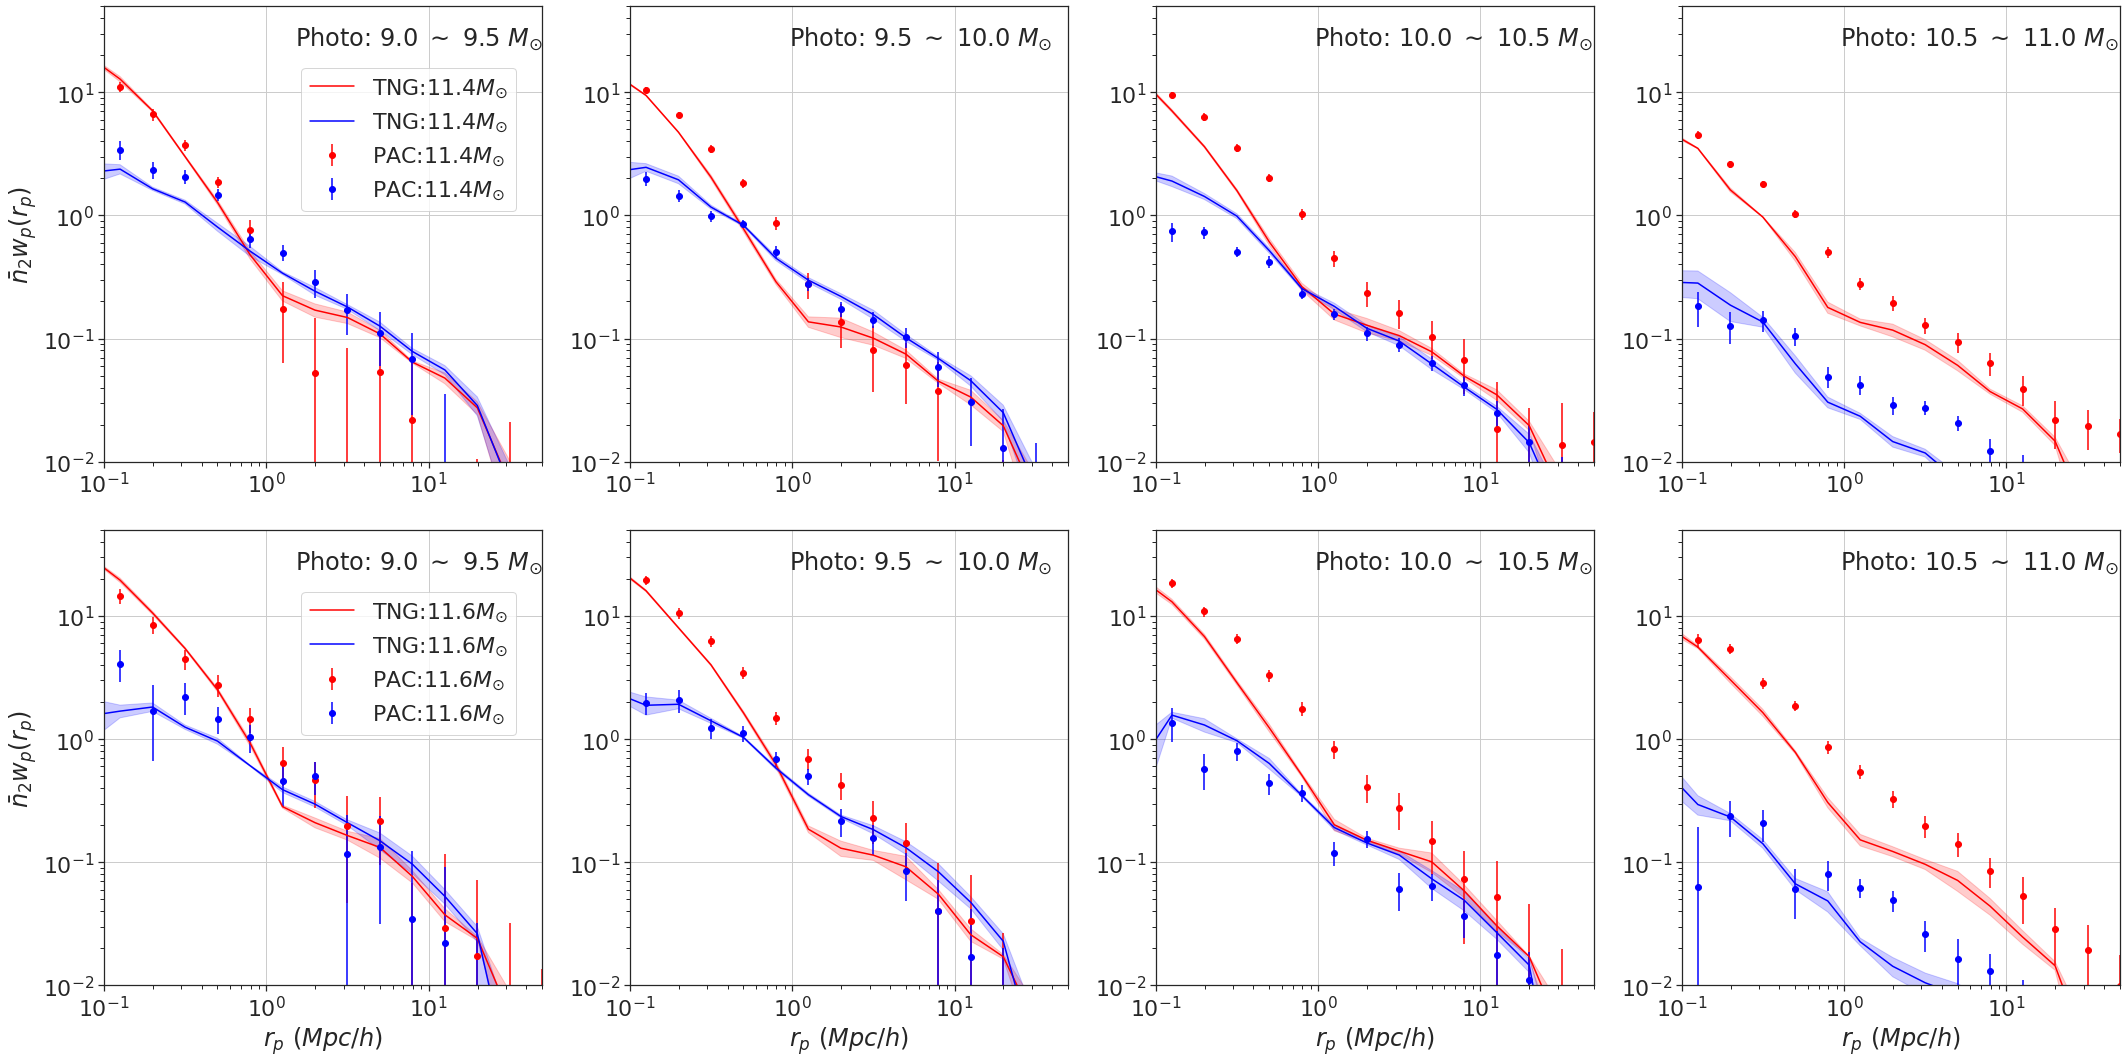

In [9]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.1,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.2)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        
        
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        plt.plot(r_need,TNG_red[0],label = 'TNG:$%.1fM_{\odot}$'% (ms[i]+0.1),color='red')
        plt.fill_between(r_need,TNG_red[0]-TNG_red[1],TNG_red[0]+TNG_red[1],color='red',alpha = 0.2)
        
        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        plt.plot(r_need,TNG_blue[0],label = 'TNG:$%.1fM_{\odot}$'% (0.1+ms[i]),color='blue')
        plt.fill_between(r_need,TNG_blue[0]-TNG_blue[1],TNG_blue[0]+TNG_blue[1],color='blue',alpha = 0.2)

        if j==0:
            
            data_red = np.load('./color_cut_red_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:$ %.1f M_{\odot}$' % (ms[i]+0.1),color='red')

            data_blue = np.load('./color_cut_blue_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:$ %.1f M_{\odot}$' % (ms[i]+0.1),color='blue')
            
            plt.ylabel('$\\bar{n}_2w_{p}(r_p)$')
            plt.text(1.5,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

            plt.legend(loc=(0.45,0.55))
                
        
#         elif j==3:
#             data_red = np.load('./color_cut_red_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#             plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='red')

#             data_blue = np.load('./color_cut_blue_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#             plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='blue')
            
            
            
        else:
            data_red = np.load('./color_cut_red/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='red')

            data_blue = np.load('./color_cut_blue/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='blue')
            plt.text(0.95,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

        if i==1:    
            plt.xlabel('$r_p\ (Mpc/h)$')



        plt.xscale('log')
        plt.yscale('log')
#         plt.text(0.93,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        plt.ylim(0.01,50)
        plt.xlim(0.1,50)
        plt.grid()
# plt.suptitle("$color cut\ : \ z=0.1\ (2\ bins)$")
# plt.savefig("/home/yunzheng/PAC_newtry/picture/0_0.2/color_distribution.pdf",dpi = 100)

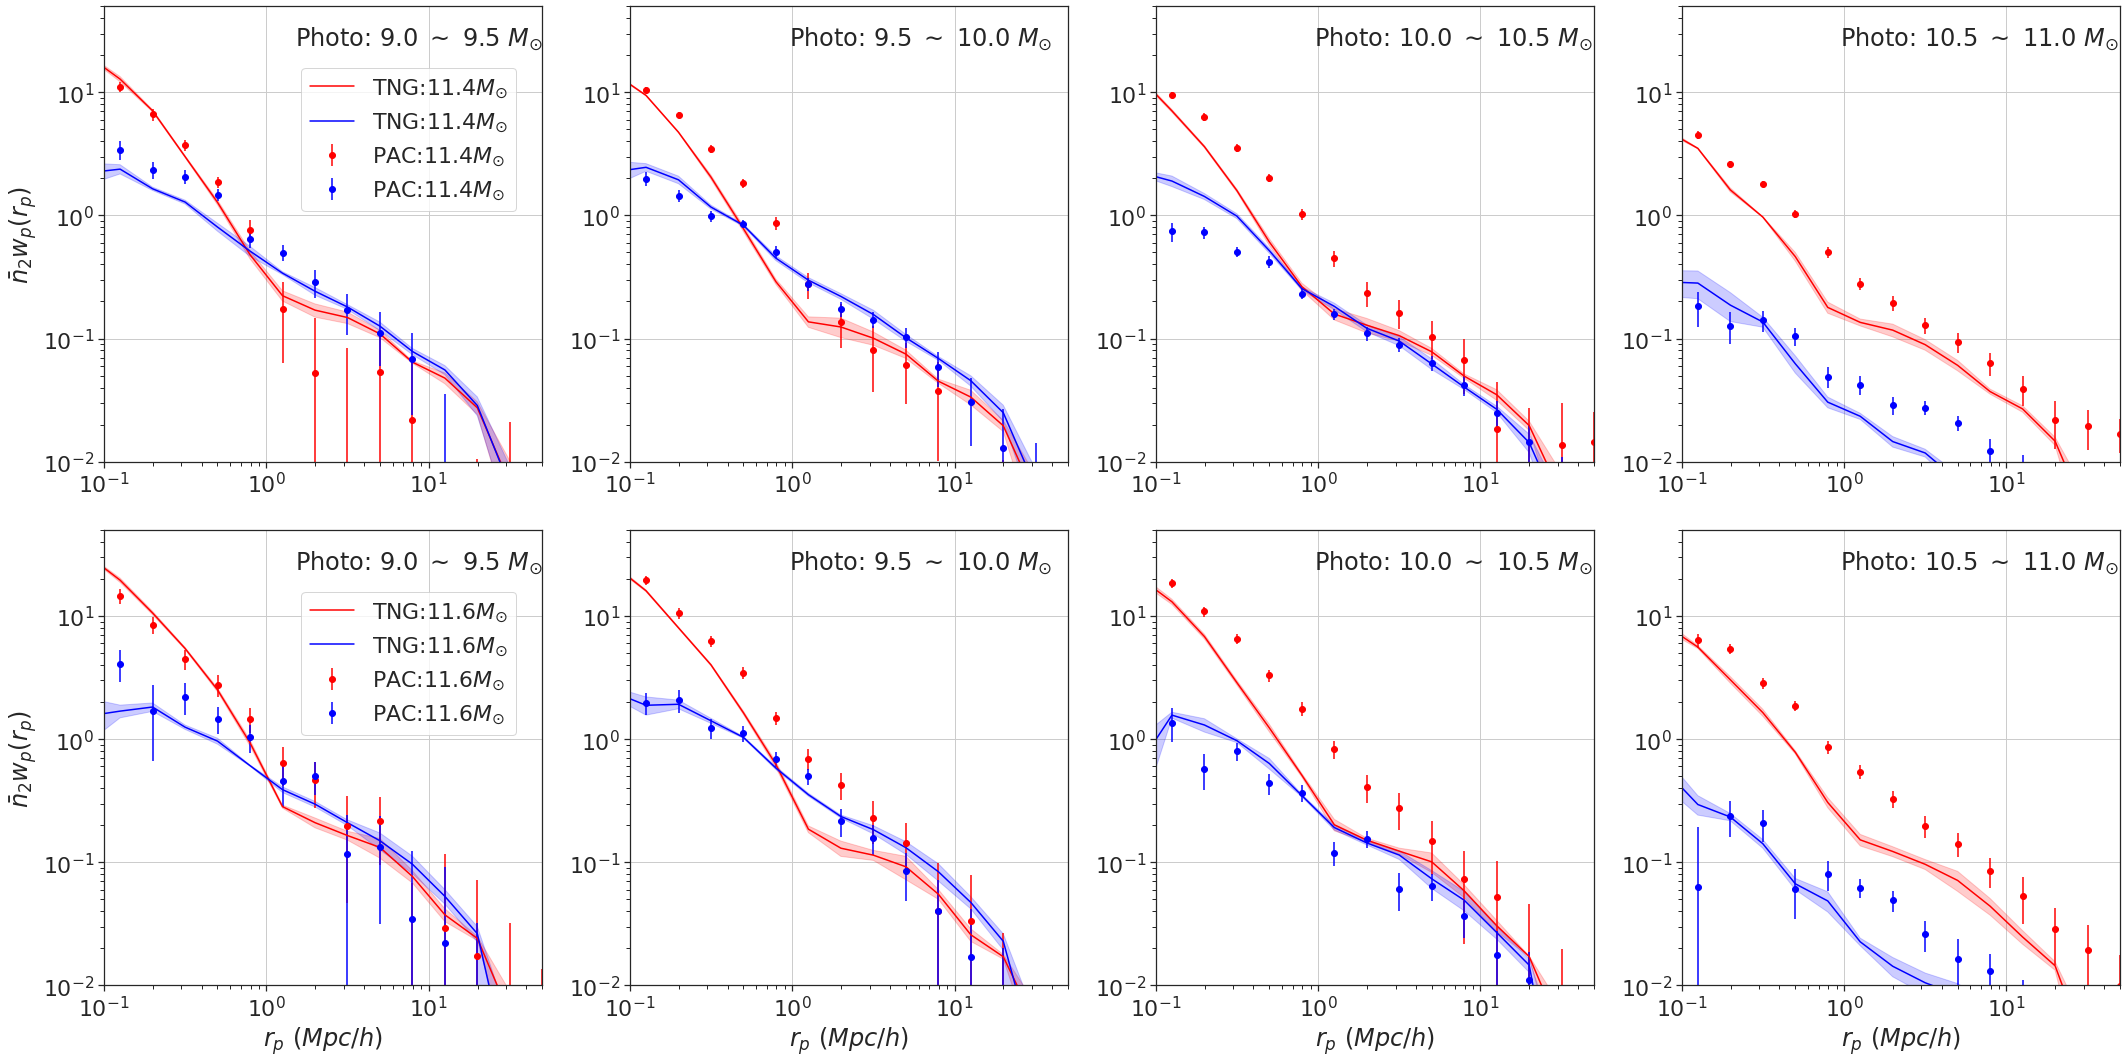

In [8]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.1,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.2)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        
        
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        plt.plot(r_need,TNG_red[0],label = 'TNG:$%.1fM_{\odot}$'% (ms[i]+0.1),color='red')
        plt.fill_between(r_need,TNG_red[0]-TNG_red[1],TNG_red[0]+TNG_red[1],color='red',alpha = 0.2)
        
        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        plt.plot(r_need,TNG_blue[0],label = 'TNG:$%.1fM_{\odot}$'% (0.1+ms[i]),color='blue')
        plt.fill_between(r_need,TNG_blue[0]-TNG_blue[1],TNG_blue[0]+TNG_blue[1],color='blue',alpha = 0.2)

        if j==0:
            
            data_red = np.load('./color_cut_red_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:$ %.1f M_{\odot}$' % (ms[i]+0.1),color='red')

            data_blue = np.load('./color_cut_blue_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:$ %.1f M_{\odot}$' % (ms[i]+0.1),color='blue')
            
            plt.ylabel('$\\bar{n}_2w_{p}(r_p)$')
            plt.text(1.5,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

            plt.legend(loc=(0.45,0.55))
                
        
#         elif j==3:
#             data_red = np.load('./color_cut_red_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#             plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='red')

#             data_blue = np.load('./color_cut_blue_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#             plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='blue')
            
            
            
        else:
            data_red = np.load('./color_cut_red/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='red')

            data_blue = np.load('./color_cut_blue/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='blue')
            plt.text(0.95,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))

        if i==1:    
            plt.xlabel('$r_p\ (Mpc/h)$')



        plt.xscale('log')
        plt.yscale('log')
#         plt.text(0.93,24,'Photo: %.1f $\sim$ %.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        plt.ylim(0.01,50)
        plt.xlim(0.1,50)
        plt.grid()
# plt.suptitle("$color cut\ : \ z=0.1\ (2\ bins)$")
# plt.savefig("/home/yunzheng/PAC_newtry/picture/0_0.2/color_distribution.pdf",dpi = 100)

### 2bins compare to 3bins

Text(0.5, 0.98, '$Red \\ galaxies \\ compare$')

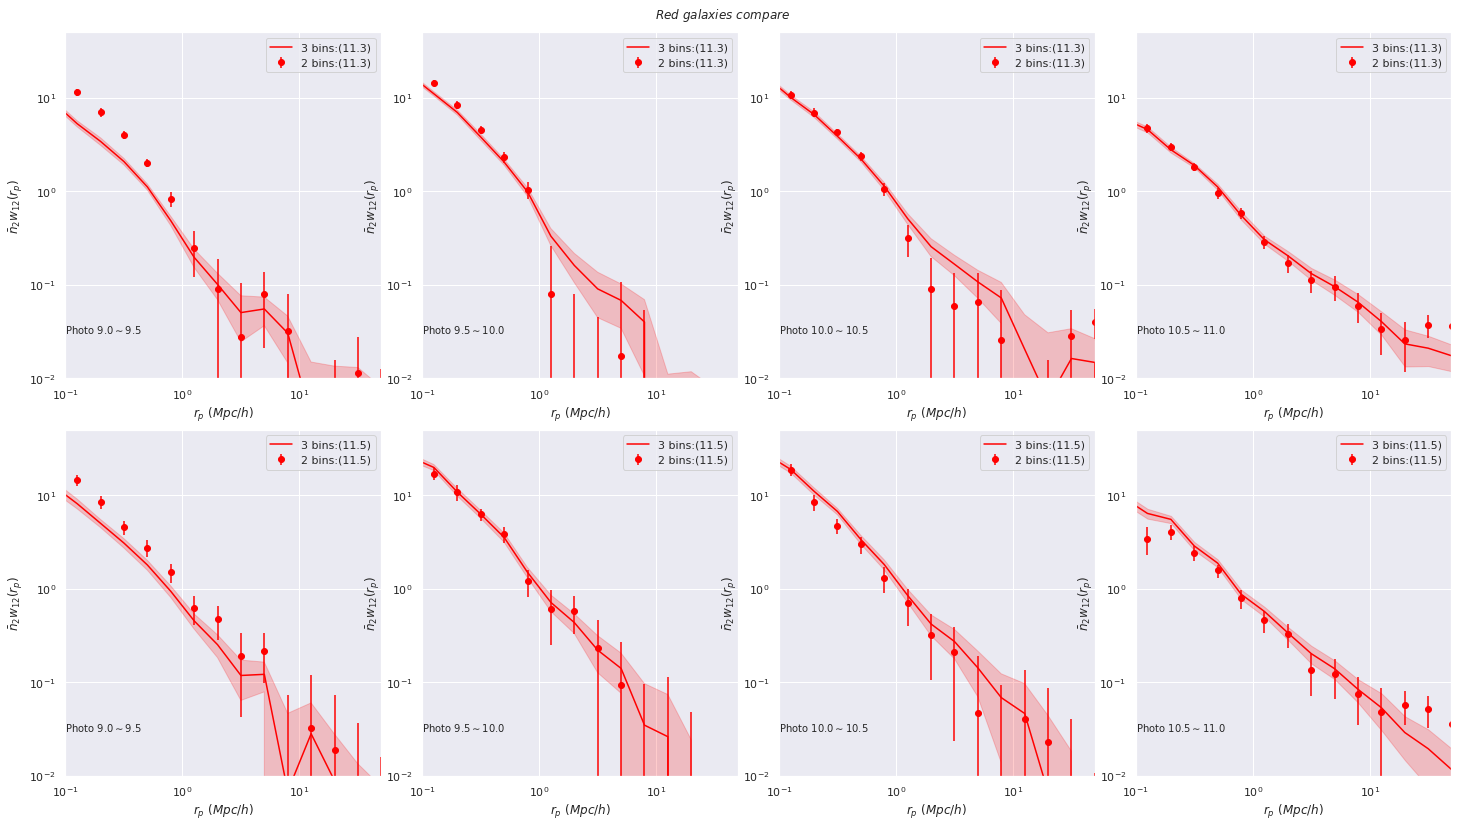

In [74]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(3,4,figsize=(22,12))
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.13)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        data_red = np.load('./color_cut_red_new/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
        plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='2 bins:(%.1f)' % ms[i],color='red')
        data_red = np.load('./color_cut_red/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)

        plt.plot(data_red[0],data_red[1],label = '3 bins:(%.1f)'% ms[i],color='red')
        plt.fill_between(data_red[0],data_red[1]-data_red[2],data_red[1]+data_red[2],color='red',alpha = 0.2)
        
        
#         data_blue = np.load('./color_cut_blue_new/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
#         plt.errorbar(data_blue[0],data_blue[1],data_blue[2],fmt='o',label='Spec:(%.1f)' % ms[i],color='blue')
#         TNG_blue = np.load("/home/yunzheng/PAC/code/PAC/0_0.2/TNG/color_cut/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
#         plt.plot(r_need,TNG_blue[0],label = 'TNG:(%.1f)'% ms[i],color='blue')
#         plt.fill_between(r_need,TNG_blue[0]-TNG_blue[1],TNG_blue[0]+TNG_blue[1],color='blue',alpha = 0.2)


        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$r_p\ (Mpc/h)$')
        plt.ylabel('$\\bar{n}_2w_{12}(r_p)$')
        plt.text(0.1,0.03,'Photo %.1f$\sim$%.1f' % (ml[j],ml[j]+0.5))
        plt.legend()
        plt.ylim(0.01,50)
        plt.xlim(0.1,50)
plt.suptitle("$Red \ galaxies \ compare$")
# plt.savefig("/home/yunzheng/PAC/picture/PCF_colorcut/red_compare.pdf",dpi = 100)

Text(0.5, 0.98, '$Blue \\ galaxies \\ compare$')

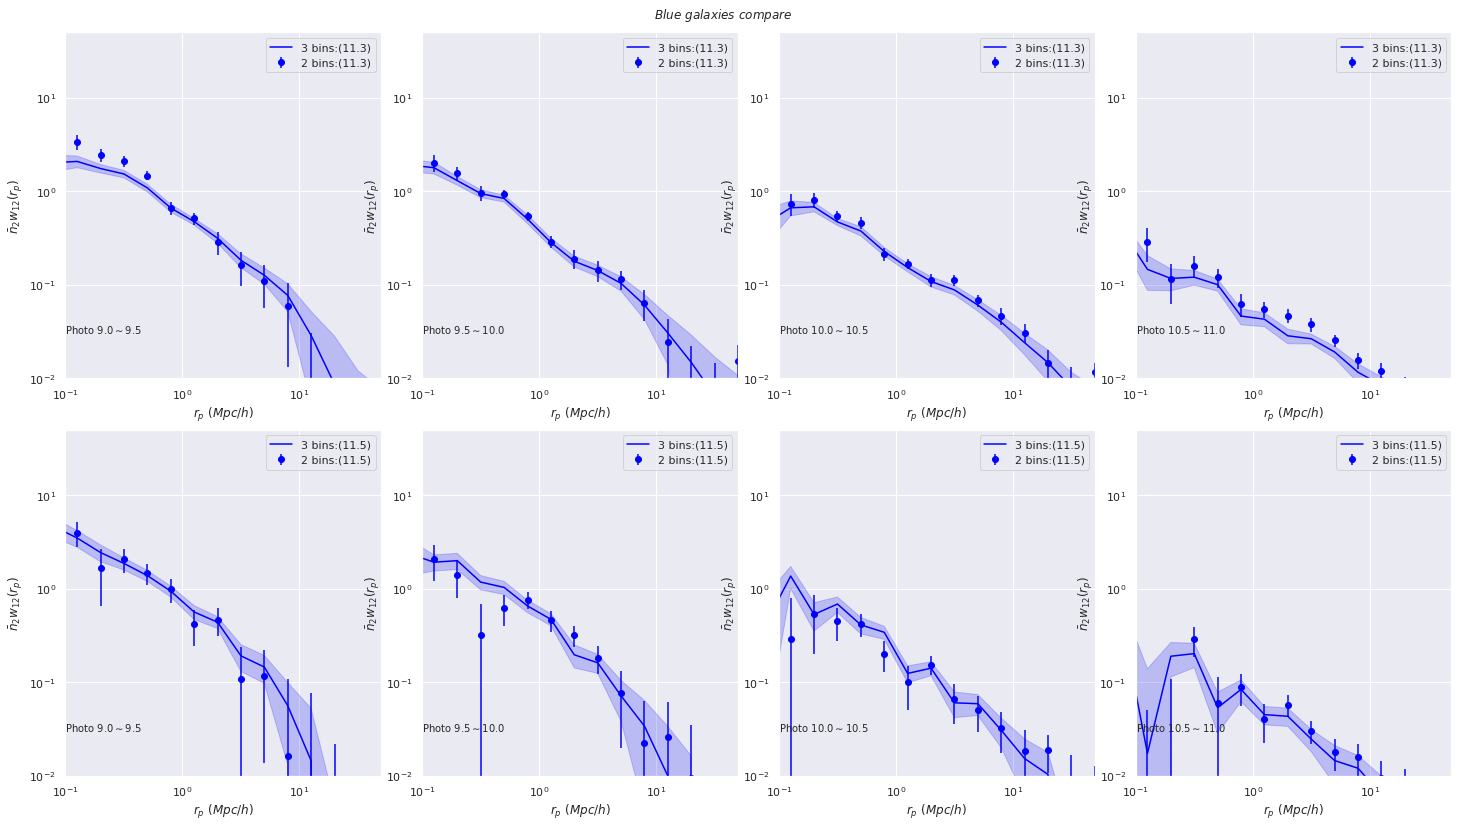

In [75]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(3,4,figsize=(22,12))
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.13)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
        data_red = np.load('./color_cut_blue_new/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
        plt.errorbar(data_red[0],data_red[1],data_red[2],fmt='o',label='2 bins:(%.1f)' % ms[i],color='blue')
        data_red = np.load('./color_cut_blue/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)

        plt.plot(data_red[0],data_red[1],label = '3 bins:(%.1f)'% ms[i],color='blue')
        plt.fill_between(data_red[0],data_red[1]-data_red[2],data_red[1]+data_red[2],color='blue',alpha = 0.2)
        


        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('$r_p\ (Mpc/h)$')
        plt.ylabel('$\\bar{n}_2w_{12}(r_p)$')
        plt.text(0.1,0.03,'Photo %.1f$\sim$%.1f' % (ml[j],ml[j]+0.5))
        plt.legend()
        plt.ylim(0.01,50)
        plt.xlim(0.1,50)
plt.suptitle("$Blue \ galaxies \ compare$")
# plt.savefig("/home/yunzheng/PAC/picture/PCF_colorcut/blue_compare.pdf",dpi = 100)

# normalize

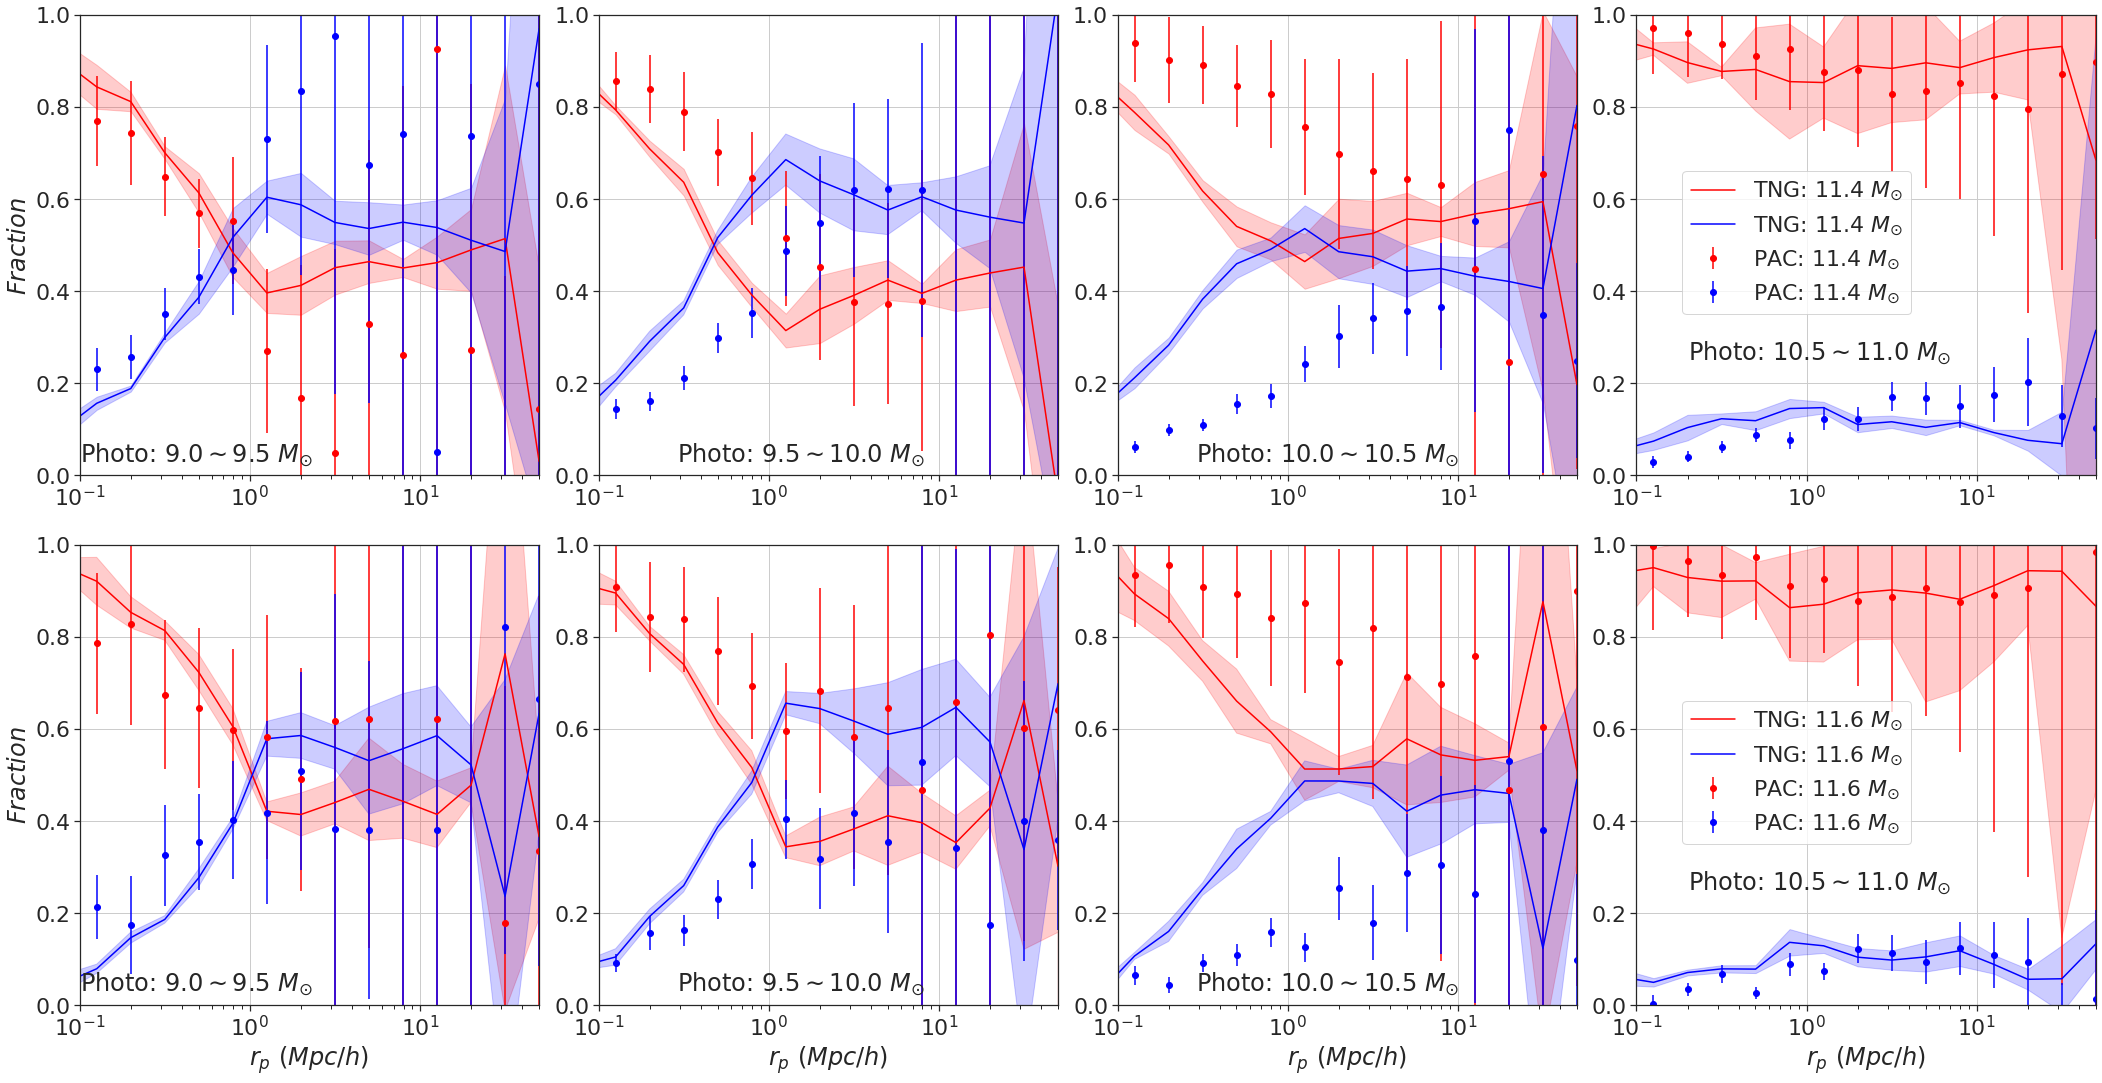

In [64]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.13)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
                
        TNG = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/nwp/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        red_nor = TNG_red[0] / TNG[0]
        red_err = np.sqrt((TNG_red[1] / TNG[0])**2 + (TNG_red[0] / (TNG[0])**2 * TNG[1])**2)


        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        blue_nor = TNG_blue[0] / TNG[0]
        blue_err = np.sqrt((TNG_blue[1] / TNG[0])**2 + (TNG_blue[0] / (TNG[0])**2 * TNG[1])**2)



        plt.plot(r_need,red_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='red')
#         plt.fill_between(r_need,red_nor-red_err,red_nor+red_err,color='red',alpha = 0.2)

        plt.plot(r_need,blue_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='blue')
#         plt.fill_between(r_need,blue_nor-blue_err,blue_nor+blue_err,color='blue',alpha = 0.2)


        
        
        if j==0:
            data_all = np.load('./SDSS_PAC_new_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            data_red = np.load('./color_cut_red_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            red_nor = data_red[1]/data_all[1]
            red_err = np.sqrt((data_red[2] / data_all[1])**2 + (data_red[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_red[0],red_nor,red_err,fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='red')


    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            data_blue = np.load('./color_cut_blue_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            blue_nor = data_blue[1]/data_all[1]
            blue_err = np.sqrt((data_blue[2] / data_all[1])**2 + (data_blue[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_blue[0],blue_nor,blue_err,fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='blue')
            plt.ylabel('$Fraction$')
            plt.text(0.1,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))



        elif j==3:
            data_all = np.load('./SDSS_PAC_cencorrected/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            data_red = np.load('./color_cut_red_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            red_nor = data_red[1]/data_all[1]
            red_err = np.sqrt((data_red[2] / data_all[1])**2 + (data_red[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_red[0],red_nor,red_err,fmt='o',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1),color='red')


    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            data_blue = np.load('./color_cut_blue_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            blue_nor = data_blue[1]/data_all[1]
            blue_err = np.sqrt((data_blue[2] / data_all[1])**2 + (data_blue[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_blue[0],blue_nor,blue_err,fmt='o',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1),color='blue')
            plt.legend(loc=(0.1,0.35))
            plt.text(0.2,0.25,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        else:
            data_all = np.load('./SDSS_PAC_cencorrected/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            data_red = np.load('./color_cut_red_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            red_nor = data_red[1]/data_all[1]
            red_err = np.sqrt((data_red[2] / data_all[1])**2 + (data_red[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_red[0],red_nor,red_err,fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='red')
            plt.text(0.29,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))



    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            data_blue = np.load('./color_cut_blue_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            blue_nor = data_blue[1]/data_all[1]
            blue_err = np.sqrt((data_blue[2] / data_all[1])**2 + (data_blue[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_blue[0],blue_nor,blue_err,fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='blue')
           
        if i==1:
            plt.xlabel('$r_p\ (Mpc/h)$')
        plt.xscale('log')
#         plt.yscale('log')
        
        
#         plt.legend(loc='upper right')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)
        plt.grid()
        
        

# plt.suptitle("$normalized \  fraction$")
# plt.savefig("/home/yunzheng/PAC_final/picture/PAC/0_0.2/color_normal2.pdf",dpi = 100)

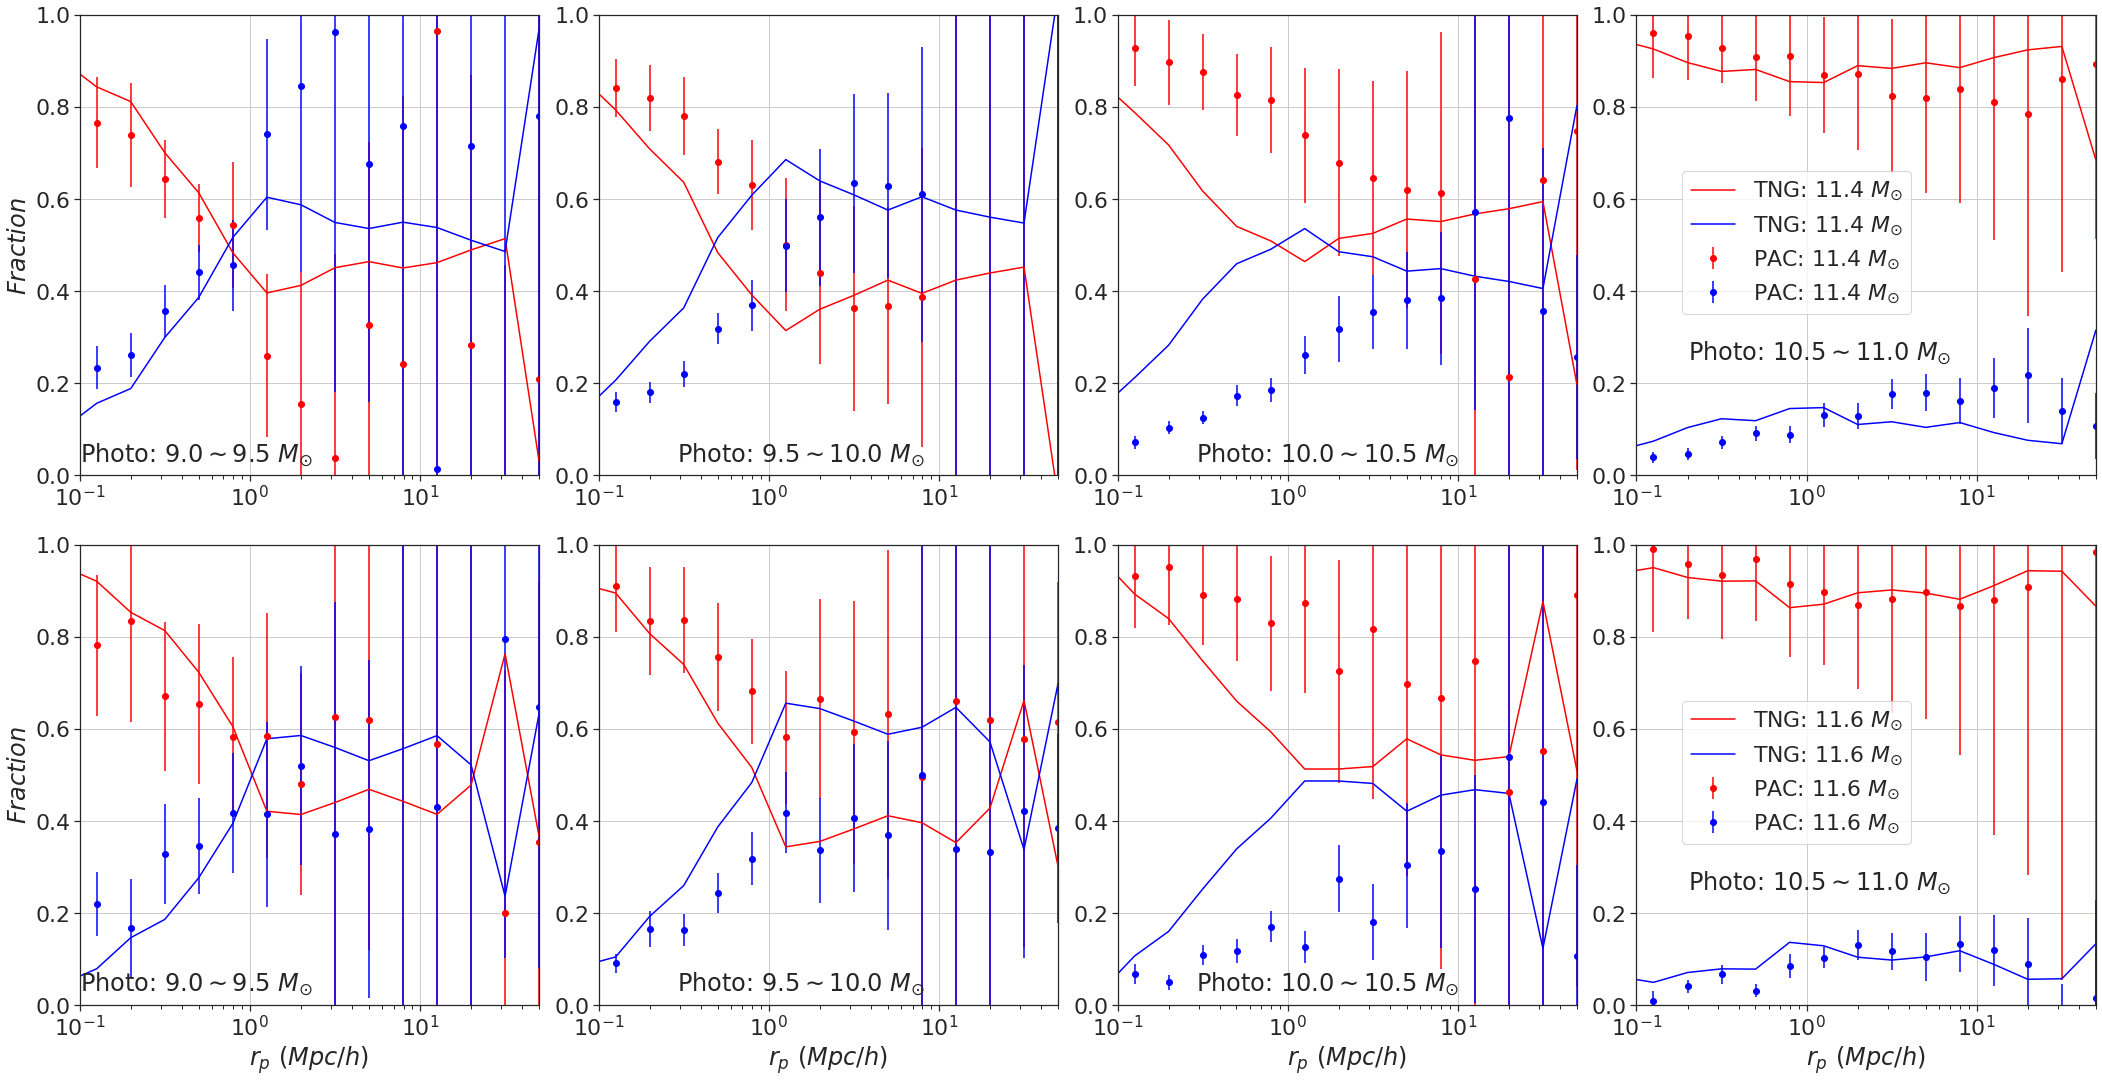

In [11]:
#plt.figure(figsize=(16,10))
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ml = [9.0,9.5,10.0,10.5]
r = np.logspace(-2, 2, 21)
# r = r[4:]
r_need = 10**((np.log10(r[1:])+np.log10(r[:-1]))/2.0)

ms = [11.3,11.5] 
# off = [0.95,1,1.05]
fig, axs = plt.subplots(2,4,figsize=(32,16))
fig.subplots_adjust(top=0.95,
bottom=0.09,
left=0.085,
right=0.96,
hspace=0.15,
wspace=0.13)


k = 0
for i in range(len(ms)):
    for j in range(len(ml)):
        k = k+1
        plt.subplot(2,4,k)
                
        TNG = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/nwp/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        TNG_red = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_red/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        red_nor = TNG_red[0] / TNG[0]
        red_err = np.sqrt((TNG_red[1] / TNG[0])**2 + (TNG_red[0] / (TNG[0])**2 * TNG[1])**2)


        TNG_blue = np.load("/home/yunzheng/PAC_final/PAC/0_0.2/TNG/color_cut_blue/nwp_%.1f_%.1f.npy"%(ms[i],ml[j]))
        blue_nor = TNG_blue[0] / TNG[0]
        blue_err = np.sqrt((TNG_blue[1] / TNG[0])**2 + (TNG_blue[0] / (TNG[0])**2 * TNG[1])**2)



        plt.plot(r_need,red_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='red')
#         plt.fill_between(r_need,red_nor-red_err,red_nor+red_err,color='red',alpha = 0.2)

        plt.plot(r_need,blue_nor,label = 'TNG: %.1f $M_{\odot}$'% (0.1+ms[i]),color='blue')
#         plt.fill_between(r_need,blue_nor-blue_err,blue_nor+blue_err,color='blue',alpha = 0.2)


        
        
        if j==0:
            data_all = np.load('/home/yunzheng/PAC_final/PAC/0_0.2/SDSS_PAC_new_cor/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            data_red = np.load('./color_cut_red_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            red_nor = data_red[1]/data_all[1]
            red_err = np.sqrt((data_red[2] / data_all[1])**2 + (data_red[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_red[0],red_nor,red_err,fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='red')


    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            data_blue = np.load('./color_cut_blue_2bins/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            blue_nor = data_blue[1]/data_all[1]
            blue_err = np.sqrt((data_blue[2] / data_all[1])**2 + (data_blue[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_blue[0],blue_nor,blue_err,fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='blue')
            plt.ylabel('$Fraction$')
            plt.text(0.1,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))



        elif j==3:
            data_all = np.load('/home/yunzheng/PAC_final/PAC/0_0.2/SDSS_PAC_cencorrected/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            data_red = np.load('./color_cut_red/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            red_nor = data_red[1]/data_all[1]
            red_err = np.sqrt((data_red[2] / data_all[1])**2 + (data_red[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_red[0],red_nor,red_err,fmt='o',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1),color='red')


    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            data_blue = np.load('./color_cut_blue/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            blue_nor = data_blue[1]/data_all[1]
            blue_err = np.sqrt((data_blue[2] / data_all[1])**2 + (data_blue[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_blue[0],blue_nor,blue_err,fmt='o',label='PAC: %.1f $M_{\odot}$' % (ms[i]+0.1),color='blue')
            plt.legend(loc=(0.1,0.35))
            plt.text(0.2,0.25,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))


        else:
            data_all = np.load('/home/yunzheng/PAC_final/PAC/0_0.2/SDSS_PAC_cencorrected/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            data_red = np.load('./color_cut_red/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            red_nor = data_red[1]/data_all[1]
            red_err = np.sqrt((data_red[2] / data_all[1])**2 + (data_red[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_red[0],red_nor,red_err,fmt='o',label='PAC:%.1f' % (ms[i]+0.1),color='red')
            plt.text(0.29,0.03,'Photo: %.1f$\sim$%.1f $M_{\odot}$' % (ml[j],ml[j]+0.5))



    #         data_all = np.load('./sdss_PAC/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
    #         data_all = np.delete(data_all,[-1,-2],1)
            data_blue = np.load('./color_cut_blue/%.1f_%.1f.npy' % (ms[i]+0.1,ml[j]),allow_pickle=True)
            blue_nor = data_blue[1]/data_all[1]
            blue_err = np.sqrt((data_blue[2] / data_all[1])**2 + (data_blue[1]/(data_all[1])**2 * data_all[2])**2)
            plt.errorbar(data_blue[0],blue_nor,blue_err,fmt='o',label='PAC:(%.1f)' % (ms[i]+0.1),color='blue')
           
        if i==1:
            plt.xlabel('$r_p\ (Mpc/h)$')
        plt.xscale('log')
#         plt.yscale('log')
        
        
#         plt.legend(loc='upper right')
        plt.ylim(0.0,1)
        plt.xlim(0.1,50)
        plt.grid()
        
        

# plt.suptitle("$normalized \  fraction$")
# plt.savefig("/home/yunzheng/PAC_final/picture/PAC/0_0.2/color_normal2.pdf",dpi = 100)

In [58]:
data_new = np.delete(data_all,[-1,-2],1)

In [59]:
data_new

array([[7.94328235e-02, 1.25892541e-01, 1.99526231e-01, 3.16227766e-01,
        5.01187234e-01, 7.94328235e-01, 1.25892541e+00, 1.99526231e+00,
        3.16227766e+00, 5.01187234e+00, 7.94328235e+00, 1.25892541e+01,
        1.99526231e+01, 3.16227766e+01],
       [1.09299103e+01, 7.30757131e+00, 5.11658772e+00, 3.59826039e+00,
        2.21219294e+00, 1.12875549e+00, 6.79560538e-01, 4.06581484e-01,
        2.31247630e-01, 1.79781069e-01, 1.07191815e-01, 3.35675024e-02,
        1.47011451e-02, 5.15005391e-03],
       [5.73454817e-01, 4.58919552e-01, 2.50060769e-01, 1.94707429e-01,
        1.26190619e-01, 9.51297383e-02, 7.66592081e-02, 6.87177483e-02,
        6.22228040e-02, 5.02437612e-02, 5.37637030e-02, 4.76275598e-02,
        4.61896085e-02, 3.73342283e-02]])